## 4. Linear/Ridge Regression class implemented with NumPy
The following code contains a linear regression class with the option for l2 regularisation, and below that a simple demonstration of its use and the benefits of regularisation. The class allows for both closed form and gradient descent methods to find the optimum solution.

In [1]:
import numpy as np
from numpy.linalg import inv

In [2]:
class LinearRegression():
    """Linear regression model that also has the option for L2 regularisation"""
    
    def __init__(self):
        
        self.weights = []
        self.error = []
        
        self.data = []
        self.targets = []
    
    def get_error(self, w, x, y, n, ridge):
        """sum of squared losses"""
        
        return (1/n) * (((x @ w) - y).T @ ((x @ w) - y) + ridge * (w.T @ w))
    
    def gradient_descent(self, x, y, d, epochs, alpha, ridge):
        """Trains model using gradient descent"""
        
        n = len(y)
        error = np.zeros(epochs)
        w = np.zeros((d, 1))
        b = 0
        for i in range(epochs):
            
            w += - (1/n) * (alpha * x.T @ ((x @ w) - y) + ridge * w)
            
            error[i] = self.get_error(w, x, y, n, ridge)
        
        self.weights = w
        self.error = error
    
    def closed_form(self, x, y, d, ridge):
        """Train model using the closed form solution"""
        
        n = len(y)
        
        w = inv(x.T @ x + ridge*np.identity(d)) @ x.T @ y
        
        self.weights = w
        self.error = self.get_error(w, x, y, n, ridge)
     
    def train(self, data, targets, dimentions, method, epochs=1000, alpha=0.002, ridge=0):
        """accepts num_data by num_dimentions array of data and column array of corresponding targets"""
        
        #centering x and y values to increase convergence time and remove the need for an intercept
        x_mean = np.mean(data, axis=0)
        y_mean = np.mean(targets, axis=0)
        x = data - x_mean
        y = targets - y_mean
        
        if method == 'GD':
            self.gradient_descent(x, y, dimentions, epochs, alpha, ridge)
            
        if method == 'CF':
            self.closed_form(x, y, dimentions, ridge)
        
        self.data = data
        self.targets = targets
        
    def predict(self, x):
        """accepts num samples by num dimentions array of data"""
        
        return (x - np.mean(self.data, axis=0)) @ self.weights + np.mean(self.targets, axis=0)
    
    def get_plots(self):
        """for 1d data - plots calculated linear regression line and plots error vs epochs"""
        
        x = np.array([min(self.data), max(self.data)])
        y = self.weights * (x - np.mean(self.data, axis=0)) + np.mean(self.targets, axis=0)

        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        ax[0].scatter(self.data, self.targets, s=0.5)
        ax[0].plot(x, y, color='k')

        ax[1].plot(range(len(self.error)), self.error, color='r')
        ax[1].set_xlabel('epochs')
        ax[1].set_ylabel('Error')

In [3]:
import matplotlib.pyplot as plt

##### Generate some noisy test data

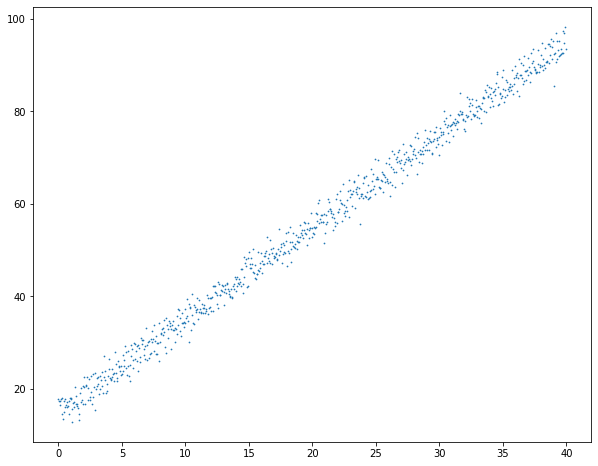

In [4]:
m1 = 2
c1 = 15
eps1 = 2

x1 = np.arange(0, 40, 0.05)
y1 = m1 * x1 + c1 + eps1 * np.random.randn(len(x1))

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x1, y1, s=0.5)

### Testing model

##### Gradient descent

In [5]:
model1 = LinearRegression()

model1.train(x1[:, np.newaxis], y1[:, np.newaxis], 1, method='GD', epochs=50)

##### converges as expected

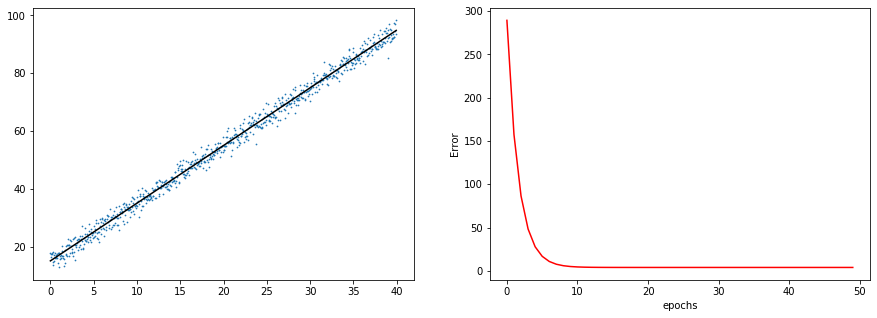

In [6]:
model1.get_plots()

In [7]:
model1.weights

array([[1.9945833]])

In [8]:
model1.error[-1]

4.081944065333517

##### gives correct prediction

In [9]:
model1.predict(np.array([0]))

array([15.13794656])

##### Closed form solution

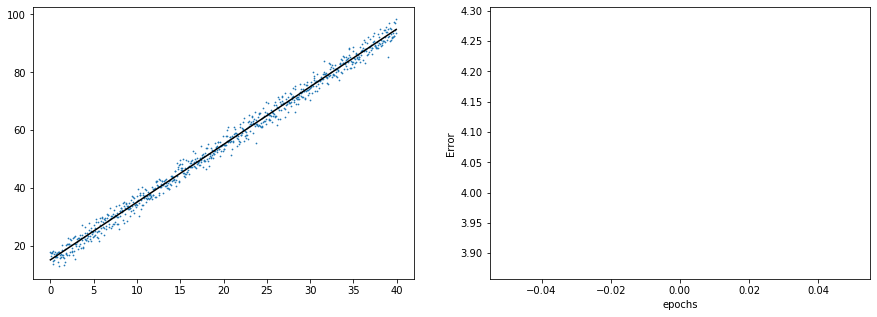

In [10]:
model2 = LinearRegression()

model2.train(x1[:, np.newaxis], y1[:, np.newaxis], 1, method='CF')

model2.get_plots()

In [11]:
model2.weights

array([[1.99458367]])

In [12]:
model2.error

array([[4.08194407]])

In [13]:
model2.predict(np.array([0]))

array([15.13793923])

##### Generating some data where the training data isn't a good representation of the distribution it was drawn from 

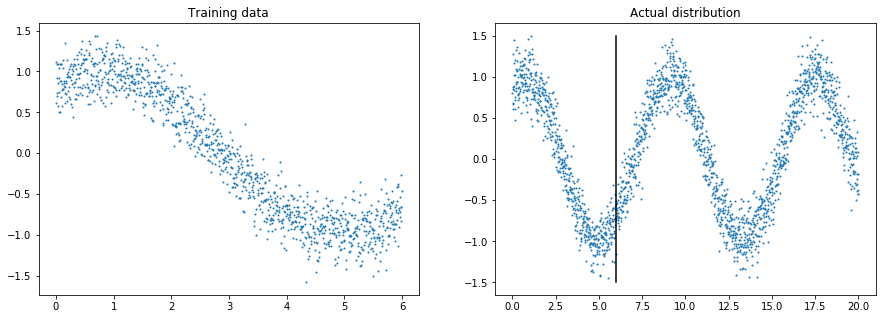

In [14]:
m2 = 0.75
c2 = 1
eps2 = 0.2

#training sample, range 0 to 6
x2 = np.arange(0, 6, 0.005)
y2 = np.sin(m2 * x2 + c2) + eps2 * np.random.randn(len(x2))

#full distribution, range 0 to 20
x3 = np.arange(0, 20, 0.01)
y3 = np.sin(m2 * x3 + c2) + eps2 * np.random.randn(len(x3))

fig, ax = plt.subplots(1, 2,figsize=(15, 5))

ax[0].scatter(x2, y2, s=1)
ax[1].scatter(x3, y3, s=1)
ax[1].plot([6, 6], [-1.5, 1.5], 'k')

ax[0].set_title('Training data')
ax[1].set_title('Actual distribution')
plt.show()

##### Standard linear regression model overfits to the training data, which leads to high test error on the actual distribution

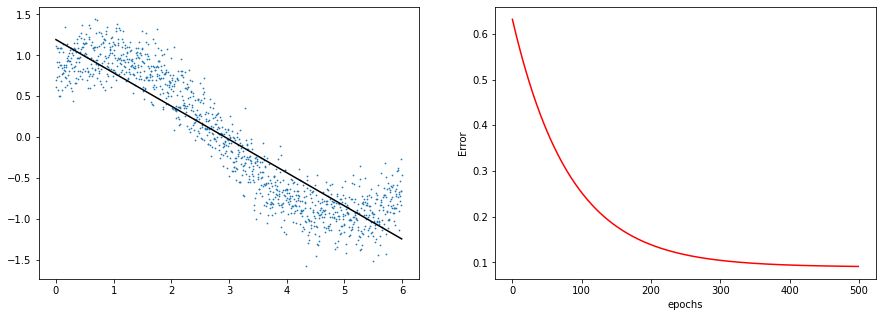

In [15]:
model3 = LinearRegression()

model3.train(x2[:, np.newaxis], y2[:, np.newaxis], 1, epochs=500, method='GD', ridge=0)

model3.get_plots()

In [16]:
results3 = model3.predict(x3[:, np.newaxis])

##### test error:

In [17]:
sum(abs(results3.flatten() - y3))

6094.614911353792

##### By adding some regularisation (ridge) this prevents the model from overfitting to the training data, which results in lower test error on the actual distribution

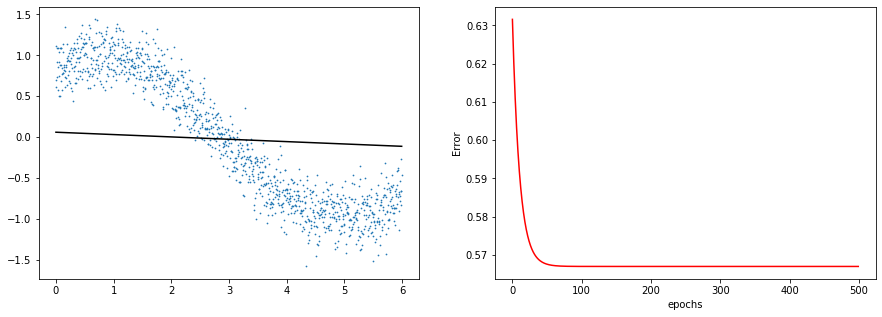

In [18]:
model4 = LinearRegression()

model4.train(x2[:, np.newaxis], y2[:, np.newaxis], 1, epochs=500, method='GD', ridge=100)

model4.get_plots()

In [19]:
results4 = model4.predict(x3[:, np.newaxis])

##### test error:

In [20]:
sum(abs(results4.flatten() - y3))

1425.5899546381079

In [21]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))